This notebook replicates what's shown on Keras.io / Getting started / [Introduction to Keras for engineers](https://keras.io/getting_started/intro_to_keras_for_engineers/).

**tl;dr**: if a model has been already created in a previous session it can be loaded as follows:

The full training process starts here ⬇️

In [1]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "jax"

# Note that Keras should only be imported after the backend
# has been configured. The backend cannot be changed once the
# package is imported.
import keras

In [4]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [3]:
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape = input_shape),
        keras.layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
        keras.layers.Conv2D(64, kernel_size = (3, 3), activation = "relu"),
        keras.layers.MaxPooling2D(pool_size = (2, 2)),
        keras.layers.Conv2D(128, kernel_size = (3, 3), activation = "relu"),
        keras.layers.Conv2D(128, kernel_size = (3, 3), activation = "relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation = "softmax"),
    ]
)

In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 260,298 (1016.79 KB)

 Trainable params: 260,298 (1016.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 1e-3),
    metrics = [
        keras.metrics.SparseCategoricalAccuracy(name = "acc"),
    ],
)

In [6]:
batch_size = 128
epochs = 5

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath = "model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 2),
]

In [7]:
model.fit(
    x_train,
    y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.15,
    callbacks = callbacks,
)

Epoch 1/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 387s 967ms/step - acc: 0.5426 - loss: 1.2873 - val_acc: 0.9633 - val_loss: 0.1203
Epoch 2/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 381s 952ms/step - acc: 0.9330 - loss: 0.2272 - val_acc: 0.9750 - val_loss: 0.0755
Epoch 3/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 379s 950ms/step - acc: 0.9565 - loss: 0.1492 - val_acc: 0.9822 - val_loss: 0.0645
Epoch 4/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 379s 950ms/step - acc: 0.9664 - loss: 0.1154 - val_acc: 0.9850 - val_loss: 0.0511
Epoch 5/5
399/399 ━━━━━━━━━━━━━━━━━━━━ 380s 954ms/step - acc: 0.9707 - loss: 0.0974 - val_acc: 0.9888 - val_loss: 0.0426


In [8]:
model.save("final_model.keras")

In [9]:
score = model.evaluate(x_test, y_test, verbose = 0)

In [5]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [6]:
predictions[27]

array([2.2779525e-14, 9.2098293e-09, 4.1328819e-13, 3.3490820e-16,
       1.0000000e+00, 5.8092992e-16, 2.0078642e-14, 2.7186254e-14,
       1.3909993e-12, 3.7303098e-09], dtype=float32)

In [7]:
(predictions[27].argmax(), predictions[27].max())

(np.int64(4), np.float32(1.0))

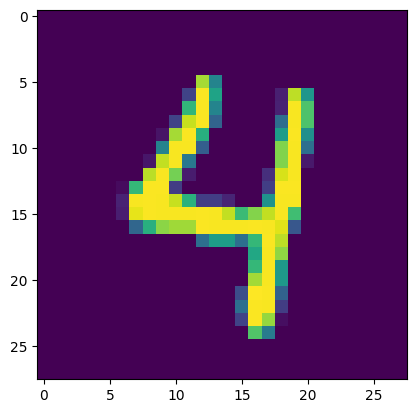

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
image = x_test[27]
plt.imshow(image)

In [9]:
y_test[27]

np.uint8(4)